# oracle training 

In [7]:
%matplotlib inline
import tensorflow as tf
import keras
import collections
from keras import layers
from keras.layers import Input,Dense,Activation,ZeroPadding2D,BatchNormalization,Flatten,Conv2D
from keras.layers import AveragePooling2D,MaxPooling2D,Dropout,GlobalMaxPool2D,GlobalAveragePooling2D
from keras.models import Model
from keras import backend as K
from keras.models import load_model
from keras.preprocessing import image
import pydot
import random
import keras.backend as K
K.set_image_data_format('channels_last')

import matplotlib.pyplot as plt
from matplotlib.pyplot import imshow

import h5py
import os
from PIL import Image
import PIL.ImageOps
from IPython.display import SVG
import scipy
import numpy as np

In [8]:
train_dataset = h5py.File("./dataset_oracle_20200602.h5",'r')
X_train = np.array(train_dataset['x_train'][:])
Y_train = np.array(train_dataset['y_train'][:])
X_test = np.array(train_dataset['x_test'][:])
Y_test = np.array(train_dataset['y_test'][:])
train_dataset.close()

In [9]:
class_names=["fire","soil","wood","water","gas","sky","human","life"]
print("train:"+str(len(X_train)),"test:"+str(len(Y_test)))

train:6400 test:1600


In [10]:
print("number of traning examples = "+str(X_train.shape[0]))
print("number of test examples = "+str(X_test.shape[0]))
print("X_train shape:" + str(X_train.shape))
print("Y_train shape:" + str(Y_train.shape))
print("X_test shape:" + str(X_test.shape))
print("Y_test shape:" + str(Y_test.shape))
train_data=(X_train,Y_train)
test_data=(X_test,Y_test)

number of traning examples = 6400
number of test examples = 1600
X_train shape:(6400, 10, 10, 1)
Y_train shape:(6400, 1)
X_test shape:(1600, 10, 10, 1)
Y_test shape:(1600, 1)


# Build a model

In [11]:
def Pimodel(input_shape):
    X_input = Input(shape=input_shape)
    X=ZeroPadding2D(padding=(1,1))(X_input)
    X=Conv2D(1,kernel_size=(3,6),strides=(3,6),use_bias=None)(X)
    X=Activation('relu')(X)
    X=Flatten()(X)
    Y=Activation('softmax')(X)
    model=Model(inputs=X_input,outputs=Y,name="JSmodel")
    return model

In [12]:
picmodel = Pimodel((10,10,1))

In [13]:
picmodel.compile(optimizer=keras.optimizers.Adam(lr=0.001,beta_1=0.9,beta_2=0.999,epsilon=1e-08,decay=0.0),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [14]:
picmodel.summary()

Model: "JSmodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10, 10, 1)]       0         
_________________________________________________________________
zero_padding2d (ZeroPadding2 (None, 12, 12, 1)         0         
_________________________________________________________________
conv2d (Conv2D)              (None, 4, 2, 1)           18        
_________________________________________________________________
activation (Activation)      (None, 4, 2, 1)           0         
_________________________________________________________________
flatten (Flatten)            (None, 8)                 0         
_________________________________________________________________
activation_1 (Activation)    (None, 8)                 0         
Total params: 18
Trainable params: 18
Non-trainable params: 0
_______________________________________________________________

In [15]:
history=picmodel.fit(x=X_train,y=Y_train,batch_size=150,epochs=1000,validation_data=(X_test,Y_test))

Epoch 1/1000
43/43 [==============================] - 0s 7ms/step - loss: 2.1187 - accuracy: 0.0791 - val_loss: 2.0956 - val_accuracy: 0.1069
Epoch 2/1000
43/43 [==============================] - 0s 3ms/step - loss: 2.0811 - accuracy: 0.1317 - val_loss: 2.0640 - val_accuracy: 0.1694
Epoch 3/1000
43/43 [==============================] - 0s 3ms/step - loss: 2.0514 - accuracy: 0.1686 - val_loss: 2.0388 - val_accuracy: 0.2013
Epoch 4/1000
43/43 [==============================] - 0s 3ms/step - loss: 2.0235 - accuracy: 0.2023 - val_loss: 2.0029 - val_accuracy: 0.2269
Epoch 5/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.9810 - accuracy: 0.2359 - val_loss: 1.9510 - val_accuracy: 0.2788
Epoch 6/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.9195 - accuracy: 0.3119 - val_loss: 1.8799 - val_accuracy: 0.3494
Epoch 7/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.8629 - accuracy: 0.3416 - val_loss: 1.8289 - val_accuracy: 0.3787
Epoch 

43/43 [==============================] - 0s 3ms/step - loss: 1.0521 - accuracy: 0.7861 - val_loss: 1.0516 - val_accuracy: 0.7744
Epoch 59/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.0450 - accuracy: 0.7875 - val_loss: 1.0447 - val_accuracy: 0.7750
Epoch 60/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.0379 - accuracy: 0.7897 - val_loss: 1.0379 - val_accuracy: 0.7769
Epoch 61/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.0311 - accuracy: 0.7905 - val_loss: 1.0313 - val_accuracy: 0.7769
Epoch 62/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.0243 - accuracy: 0.7973 - val_loss: 1.0249 - val_accuracy: 0.7831
Epoch 63/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.0177 - accuracy: 0.8009 - val_loss: 1.0184 - val_accuracy: 0.7856
Epoch 64/1000
43/43 [==============================] - 0s 3ms/step - loss: 1.0113 - accuracy: 0.8020 - val_loss: 1.0122 - val_accuracy: 0.7875
Epoch 65/1000

43/43 [==============================] - 0s 3ms/step - loss: 0.7913 - accuracy: 0.8606 - val_loss: 0.7994 - val_accuracy: 0.8531
Epoch 116/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.7884 - accuracy: 0.8612 - val_loss: 0.7964 - val_accuracy: 0.8531
Epoch 117/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.7855 - accuracy: 0.8614 - val_loss: 0.7936 - val_accuracy: 0.8544
Epoch 118/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.7826 - accuracy: 0.8633 - val_loss: 0.7908 - val_accuracy: 0.8544
Epoch 119/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.7797 - accuracy: 0.8634 - val_loss: 0.7881 - val_accuracy: 0.8544
Epoch 120/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.7769 - accuracy: 0.8650 - val_loss: 0.7854 - val_accuracy: 0.8562
Epoch 121/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.7741 - accuracy: 0.8645 - val_loss: 0.7827 - val_accuracy: 0.8562
Epoch 1

Epoch 172/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.8892 - val_loss: 0.6796 - val_accuracy: 0.8806
Epoch 173/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.6653 - accuracy: 0.8894 - val_loss: 0.6780 - val_accuracy: 0.8806
Epoch 174/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.6638 - accuracy: 0.8894 - val_loss: 0.6765 - val_accuracy: 0.8813
Epoch 175/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.6622 - accuracy: 0.8894 - val_loss: 0.6750 - val_accuracy: 0.8813
Epoch 176/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.6607 - accuracy: 0.8894 - val_loss: 0.6735 - val_accuracy: 0.8813
Epoch 177/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.6592 - accuracy: 0.8898 - val_loss: 0.6722 - val_accuracy: 0.8813
Epoch 178/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.6577 - accuracy: 0.8902 - val_loss: 0.6707 - val_accuracy:

Epoch 229/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5977 - accuracy: 0.9217 - val_loss: 0.6133 - val_accuracy: 0.9131
Epoch 230/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5968 - accuracy: 0.9264 - val_loss: 0.6124 - val_accuracy: 0.9200
Epoch 231/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5959 - accuracy: 0.9186 - val_loss: 0.6115 - val_accuracy: 0.9131
Epoch 232/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5950 - accuracy: 0.9184 - val_loss: 0.6107 - val_accuracy: 0.9137
Epoch 233/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5940 - accuracy: 0.9225 - val_loss: 0.6098 - val_accuracy: 0.9212
Epoch 234/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5932 - accuracy: 0.9272 - val_loss: 0.6089 - val_accuracy: 0.9212
Epoch 235/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5923 - accuracy: 0.9233 - val_loss: 0.6081 - val_accuracy:

Epoch 286/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5562 - accuracy: 0.9292 - val_loss: 0.5732 - val_accuracy: 0.9237
Epoch 287/1000
43/43 [==============================] - 0s 8ms/step - loss: 0.5556 - accuracy: 0.9292 - val_loss: 0.5726 - val_accuracy: 0.9237
Epoch 288/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5550 - accuracy: 0.9292 - val_loss: 0.5722 - val_accuracy: 0.9237
Epoch 289/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5545 - accuracy: 0.9292 - val_loss: 0.5716 - val_accuracy: 0.9237
Epoch 290/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5539 - accuracy: 0.9292 - val_loss: 0.5711 - val_accuracy: 0.9244
Epoch 291/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5534 - accuracy: 0.9292 - val_loss: 0.5706 - val_accuracy: 0.9237
Epoch 292/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5529 - accuracy: 0.9292 - val_loss: 0.5700 - val_accuracy:

Epoch 343/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5301 - accuracy: 0.9347 - val_loss: 0.5488 - val_accuracy: 0.9300
Epoch 344/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5298 - accuracy: 0.9347 - val_loss: 0.5485 - val_accuracy: 0.9300
Epoch 345/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5294 - accuracy: 0.9347 - val_loss: 0.5481 - val_accuracy: 0.9300
Epoch 346/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5291 - accuracy: 0.9347 - val_loss: 0.5478 - val_accuracy: 0.9300
Epoch 347/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5287 - accuracy: 0.9347 - val_loss: 0.5475 - val_accuracy: 0.9300
Epoch 348/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5283 - accuracy: 0.9347 - val_loss: 0.5471 - val_accuracy: 0.9300
Epoch 349/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5280 - accuracy: 0.9347 - val_loss: 0.5468 - val_accuracy:

Epoch 400/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5135 - accuracy: 0.9395 - val_loss: 0.5336 - val_accuracy: 0.9331
Epoch 401/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5132 - accuracy: 0.9395 - val_loss: 0.5334 - val_accuracy: 0.9331
Epoch 402/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5130 - accuracy: 0.9395 - val_loss: 0.5331 - val_accuracy: 0.9331
Epoch 403/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5128 - accuracy: 0.9395 - val_loss: 0.5329 - val_accuracy: 0.9331
Epoch 404/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5126 - accuracy: 0.9395 - val_loss: 0.5328 - val_accuracy: 0.9331
Epoch 405/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.5124 - accuracy: 0.9395 - val_loss: 0.5326 - val_accuracy: 0.9331
Epoch 406/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.5121 - accuracy: 0.9395 - val_loss: 0.5324 - val_accuracy:

Epoch 457/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.5028 - accuracy: 0.9411 - val_loss: 0.5241 - val_accuracy: 0.9337
Epoch 458/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.5027 - accuracy: 0.9411 - val_loss: 0.5240 - val_accuracy: 0.9337
Epoch 459/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.5025 - accuracy: 0.9411 - val_loss: 0.5238 - val_accuracy: 0.9337
Epoch 460/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.5024 - accuracy: 0.9411 - val_loss: 0.5237 - val_accuracy: 0.9337
Epoch 461/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.5022 - accuracy: 0.9411 - val_loss: 0.5236 - val_accuracy: 0.9337
Epoch 462/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.5021 - accuracy: 0.9411 - val_loss: 0.5235 - val_accuracy: 0.9337
Epoch 463/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.5019 - accuracy: 0.9416 - val_loss: 0.5233 - val_accuracy:

Epoch 514/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.4958 - accuracy: 0.9423 - val_loss: 0.5181 - val_accuracy: 0.9337
Epoch 515/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.4957 - accuracy: 0.9427 - val_loss: 0.5180 - val_accuracy: 0.9337
Epoch 516/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.4956 - accuracy: 0.9427 - val_loss: 0.5180 - val_accuracy: 0.9337
Epoch 517/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.4955 - accuracy: 0.9420 - val_loss: 0.5179 - val_accuracy: 0.9331
Epoch 518/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.4954 - accuracy: 0.9427 - val_loss: 0.5178 - val_accuracy: 0.9337
Epoch 519/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4953 - accuracy: 0.9427 - val_loss: 0.5177 - val_accuracy: 0.9337
Epoch 520/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4953 - accuracy: 0.9420 - val_loss: 0.5177 - val_accuracy:

Epoch 571/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4911 - accuracy: 0.9423 - val_loss: 0.5141 - val_accuracy: 0.9350
Epoch 572/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4911 - accuracy: 0.9423 - val_loss: 0.5140 - val_accuracy: 0.9350
Epoch 573/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4910 - accuracy: 0.9423 - val_loss: 0.5139 - val_accuracy: 0.9350
Epoch 574/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4909 - accuracy: 0.9423 - val_loss: 0.5139 - val_accuracy: 0.9331
Epoch 575/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4909 - accuracy: 0.9423 - val_loss: 0.5139 - val_accuracy: 0.9331
Epoch 576/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4908 - accuracy: 0.9423 - val_loss: 0.5138 - val_accuracy: 0.9331
Epoch 577/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4908 - accuracy: 0.9423 - val_loss: 0.5137 - val_accuracy:

Epoch 628/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4878 - accuracy: 0.9417 - val_loss: 0.5115 - val_accuracy: 0.9331
Epoch 629/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4878 - accuracy: 0.9417 - val_loss: 0.5115 - val_accuracy: 0.9331
Epoch 630/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4878 - accuracy: 0.9417 - val_loss: 0.5115 - val_accuracy: 0.9331
Epoch 631/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4877 - accuracy: 0.9417 - val_loss: 0.5114 - val_accuracy: 0.9331
Epoch 632/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4876 - accuracy: 0.9417 - val_loss: 0.5114 - val_accuracy: 0.9331
Epoch 633/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.4876 - accuracy: 0.9417 - val_loss: 0.5114 - val_accuracy: 0.9331
Epoch 634/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4876 - accuracy: 0.9417 - val_loss: 0.5113 - val_accuracy:

Epoch 685/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4856 - accuracy: 0.9417 - val_loss: 0.5100 - val_accuracy: 0.9331
Epoch 686/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4855 - accuracy: 0.9417 - val_loss: 0.5099 - val_accuracy: 0.9331
Epoch 687/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4855 - accuracy: 0.9417 - val_loss: 0.5099 - val_accuracy: 0.9331
Epoch 688/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4855 - accuracy: 0.9417 - val_loss: 0.5099 - val_accuracy: 0.9331
Epoch 689/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.9417 - val_loss: 0.5099 - val_accuracy: 0.9331
Epoch 690/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.9417 - val_loss: 0.5099 - val_accuracy: 0.9331
Epoch 691/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4854 - accuracy: 0.9417 - val_loss: 0.5098 - val_accuracy:

Epoch 742/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4840 - accuracy: 0.9420 - val_loss: 0.5091 - val_accuracy: 0.9337
Epoch 743/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4840 - accuracy: 0.9420 - val_loss: 0.5090 - val_accuracy: 0.9337
Epoch 744/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4840 - accuracy: 0.9420 - val_loss: 0.5090 - val_accuracy: 0.9337
Epoch 745/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.9420 - val_loss: 0.5090 - val_accuracy: 0.9337
Epoch 746/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.9420 - val_loss: 0.5090 - val_accuracy: 0.9337
Epoch 747/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.4839 - accuracy: 0.9420 - val_loss: 0.5090 - val_accuracy: 0.9337
Epoch 748/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4839 - accuracy: 0.9420 - val_loss: 0.5090 - val_accuracy:

Epoch 799/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.9425 - val_loss: 0.5085 - val_accuracy: 0.9356
Epoch 800/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.9425 - val_loss: 0.5085 - val_accuracy: 0.9337
Epoch 801/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.9425 - val_loss: 0.5085 - val_accuracy: 0.9356
Epoch 802/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.9425 - val_loss: 0.5085 - val_accuracy: 0.9356
Epoch 803/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4829 - accuracy: 0.9427 - val_loss: 0.5085 - val_accuracy: 0.9337
Epoch 804/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4828 - accuracy: 0.9425 - val_loss: 0.5085 - val_accuracy: 0.9356
Epoch 805/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.4828 - accuracy: 0.9425 - val_loss: 0.5084 - val_accuracy:

Epoch 856/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.4821 - accuracy: 0.9427 - val_loss: 0.5082 - val_accuracy: 0.9356
Epoch 857/1000
43/43 [==============================] - 0s 4ms/step - loss: 0.4821 - accuracy: 0.9430 - val_loss: 0.5082 - val_accuracy: 0.9356
Epoch 858/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.9430 - val_loss: 0.5082 - val_accuracy: 0.9356
Epoch 859/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.9427 - val_loss: 0.5082 - val_accuracy: 0.9356
Epoch 860/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.9430 - val_loss: 0.5082 - val_accuracy: 0.9356
Epoch 861/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.9430 - val_loss: 0.5081 - val_accuracy: 0.9356
Epoch 862/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4821 - accuracy: 0.9425 - val_loss: 0.5081 - val_accuracy:

Epoch 913/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.9431 - val_loss: 0.5080 - val_accuracy: 0.9356
Epoch 914/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.9431 - val_loss: 0.5080 - val_accuracy: 0.9356
Epoch 915/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.9431 - val_loss: 0.5080 - val_accuracy: 0.9356
Epoch 916/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.9431 - val_loss: 0.5080 - val_accuracy: 0.9356
Epoch 917/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.9431 - val_loss: 0.5080 - val_accuracy: 0.9356
Epoch 918/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4816 - accuracy: 0.9431 - val_loss: 0.5081 - val_accuracy: 0.9356
Epoch 919/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4815 - accuracy: 0.9431 - val_loss: 0.5080 - val_accuracy:

Epoch 970/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4812 - accuracy: 0.9431 - val_loss: 0.5080 - val_accuracy: 0.9356
Epoch 971/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4812 - accuracy: 0.9431 - val_loss: 0.5080 - val_accuracy: 0.9356
Epoch 972/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4812 - accuracy: 0.9431 - val_loss: 0.5080 - val_accuracy: 0.9356
Epoch 973/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4812 - accuracy: 0.9431 - val_loss: 0.5080 - val_accuracy: 0.9356
Epoch 974/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4812 - accuracy: 0.9431 - val_loss: 0.5080 - val_accuracy: 0.9356
Epoch 975/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4812 - accuracy: 0.9431 - val_loss: 0.5080 - val_accuracy: 0.9356
Epoch 976/1000
43/43 [==============================] - 0s 3ms/step - loss: 0.4812 - accuracy: 0.9431 - val_loss: 0.5080 - val_accuracy:

In [16]:
preds = picmodel.evaluate(x=X_test,y=Y_test)
print('Test Loss=' + str(preds[0]))
print("Test Accuacy="+str(preds[1]))

50/50 [==============================] - 0s 1ms/step - loss: 0.5080 - accuracy: 0.9356
Test Loss=0.5080051422119141
Test Accuacy=0.9356250166893005


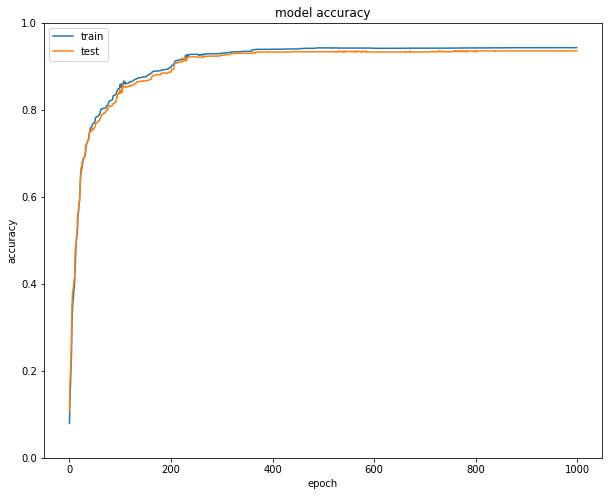

In [23]:
plt.figure(figsize=(10,8))
plt.plot(history.history["accuracy"])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.ylim((0, 1))
plt.legend(['train', 'test'], loc='best')

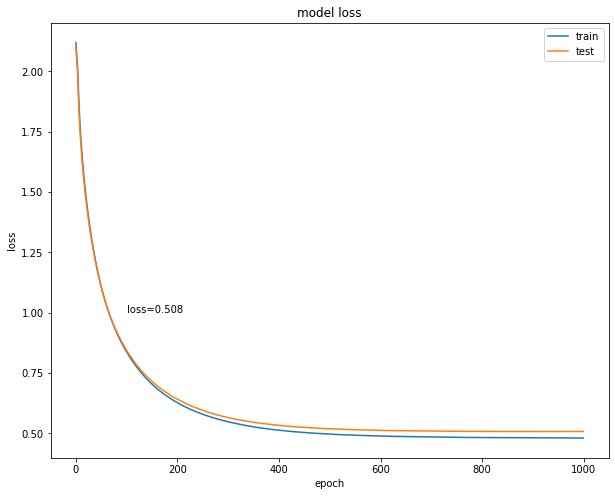

In [22]:
plt.figure(figsize=(10,8))
plt.plot(history.history["loss"])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.text(100,1,"loss="+str(round(preds[0],3)))
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='best')

## Check the weight and bias

In [24]:
picmodel=load_model("./model_oracle_20200602.h5")

In [25]:
print(picmodel.summary())

Model: "JSmodel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 10, 10, 1)]       0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 12, 12, 1)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 2, 1)           18        
_________________________________________________________________
activation_3 (Activation)    (None, 4, 2, 1)           0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 8)                 0         
_________________________________________________________________
activation_4 (Activation)    (None, 8)                 0         
Total params: 18
Trainable params: 18
Non-trainable params: 0
_______________________________________________________________

In [26]:
kernel_weights=np.squeeze(picmodel.get_weights())
#print(kernel_weights.flatten())
a1=np.squeeze(kernel_weights)[0:3,0:6].flatten()
print(kernel_weights)
N=abs(a1.flatten())[np.argmax(abs(a1.flatten()))]
print(N)
a1_nor=a1.flatten()/N
print(a1_nor)

[[  0.511051     1.8627748   -0.37228268  -8.946859    -3.84545
    6.7440915 ]
 [  1.042268     0.19172572   6.5890512    0.06017428 -10.801631
    3.455447  ]
 [  2.2271879    1.3307854  -11.019965    -5.4938097   -7.842294
   -2.555021  ]]
11.019965
[ 0.04637501  0.16903636 -0.03378256 -0.8118773  -0.348953    0.6119885
  0.09457997  0.01739803  0.5979194   0.00546048 -0.9801874   0.31356242
  0.2021048   0.12076131 -1.         -0.4985324  -0.7116442  -0.23185383]


# the layer output, you need run the part with raw_datasets

In [29]:
def get_layer_output(model,x,index=0):
    layer = K.function([model.input],[model.layers[index].output])
    return layer([x])[0]

In [30]:
path="./twolayerdata_oracle/fire/"
imlist=os.listdir(path)
fire_t=[]
Fire_t=[]

fn_t=[]
for elef in imlist:
    input_x = np.array(np.load(r"./twolayerdata_oracle/fire/"+elef))
    input_x=input_x[0][1:11,1:11]
    input_x = np.expand_dims(input_x,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_4 = get_layer_output(picmodel,input_x,index=4)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    fire_t.append(class_names[np.argmax(layer_5)])
    #print(elef,layer_2.flatten())
    if class_names[np.argmax(layer_5)]=="fire":
        FN_t=[]
        FN_t.append(elef)
        FN_t.append(layer_2.flatten())
        fn_t.append(FN_t)
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        Fire_t.append(elef)
#print(fn_t)
f1=collections.Counter(fire_t)
print(len(fire_t),collections.Counter(fire_t))

1000 Counter({'fire': 899, 'wood': 53, 'life': 20, 'human': 9, 'gas': 8, 'sky': 6, 'soil': 3, 'water': 2})


In [40]:
path="./twolayerdata_oracle/soil/"
imlist=os.listdir(path)
soil_T=[]
Soil_T=[]
for elef in imlist:
    input_x = np.array(np.load(r"./twolayerdata_oracle/soil/"+elef))
    input_x=input_x[0][1:11,1:11]
    input_x = np.expand_dims(input_x,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    #print(class_names[np.argmax(layer_6)])
    soil_T.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="soil":
        #print(elef,layer_5,class_names[np.argmax(layer_5)])
        #print(elef)
        #print(layer_2.flatten())
        #print(class_names[np.argmax(layer_5)])
        Soil_T.append([elef,layer_2.flatten()])
s1=collections.Counter(soil_T)
print(len(soil_T),collections.Counter(soil_T))

1000 Counter({'soil': 913, 'fire': 26, 'water': 22, 'sky': 16, 'life': 16, 'human': 4, 'gas': 3})


In [41]:
path="./twolayerdata_oracle/wood/"
imlist=os.listdir(path)
wood_T=[]
Wood_T=[]
for elef in imlist:
    input_x = np.array(np.load(r"./twolayerdata_oracle/wood/"+elef))
    input_x=input_x[0][1:11,1:11]
    input_x = np.expand_dims(input_x,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    wood_T.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="wood":
        #print(elef,layer_5,class_names[np.argmax(layer_5)])
        #print(elef)
        #print(layer_2.flatten())
        #print(class_names[np.argmax(layer_5)])
        Wood_T.append([elef,layer_2.flatten()])
print(len(wood_T),collections.Counter(wood_T))
W1=collections.Counter(wood_T)


1000 Counter({'wood': 987, 'water': 5, 'soil': 4, 'sky': 4})


In [42]:
path="./twolayerdata_oracle/water/"
imlist=os.listdir(path)
water_T=[]
Water_T=[]
for elef in imlist:
    input_x = np.array(np.load(r"./twolayerdata_oracle/water/"+elef))
    input_x=input_x[0][1:11,1:11]
    input_x = np.expand_dims(input_x,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    #print(class_names[np.argmax(layer_6)])
    water_T.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="water":
        #print(elef,layer_5,class_names[np.argmax(layer_5)])
        #print(elef)
        #print(layer_2.flatten())
        #print(class_names[np.argmax(layer_5)])
        Water_T.append([elef,layer_2.flatten()])
print(len(water_T),collections.Counter(water_T))
w1=collections.Counter(water_T)

1000 Counter({'water': 913, 'sky': 55, 'life': 10, 'human': 10, 'soil': 9, 'gas': 2, 'fire': 1})


In [43]:
path="./twolayerdata_oracle/gas/"
imlist=os.listdir(path)
gas_T=[]
Gas_T=[]
for elef in imlist:
    input_x = np.array(np.load(r"./twolayerdata_oracle/gas/"+elef))
    input_x=input_x[0][1:11,1:11]
    input_x = np.expand_dims(input_x,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    #print(class_names[np.argmax(layer_6)])
    #print(elef,layer_6,np.argmax(layer_6))
    gas_T.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="gas":
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        Gas_T.append([elef,layer_2.flatten()])
print(len(gas_T),collections.Counter(gas_T))
G1=collections.Counter(gas_T)

1000 Counter({'gas': 962, 'fire': 11, 'human': 10, 'water': 8, 'wood': 3, 'life': 2, 'soil': 2, 'sky': 2})


In [44]:
path="./twolayerdata_oracle/sky/"
imlist=os.listdir(path)
sky_T=[]
Sky_T=[]
for elef in imlist:
    input_x = np.array(np.load(r"./twolayerdata_oracle/sky/"+elef))
    input_x=input_x[0][1:11,1:11]
    input_x = np.expand_dims(input_x,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    sky_T.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="sky":
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        Sky_T.append([elef,layer_2.flatten()])
print(len(sky_T),collections.Counter(sky_T))
S1=collections.Counter(sky_T)

1000 Counter({'sky': 922, 'soil': 26, 'water': 21, 'human': 15, 'life': 6, 'gas': 4, 'fire': 3, 'wood': 3})


In [45]:
path="./twolayerdata_oracle/human/"
imlist=os.listdir(path)
human_T=[]
Human_t=[]
for elef in imlist:
    input_x = np.array(np.load(r"./twolayerdata_oracle/human/"+elef))
    input_x=input_x[0][1:11,1:11]
    input_x = np.expand_dims(input_x,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    #print(elef,layer_6,np.argmax(layer_6))
    human_T.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="human":
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        Human_t.append([elef,layer_2.flatten()])
H1=collections.Counter(human_T)
print(len(human_T),collections.Counter(human_T))

1000 Counter({'human': 939, 'wood': 28, 'water': 15, 'sky': 10, 'gas': 8})


In [46]:
path="./twolayerdata_oracle/life/"
imlist=os.listdir(path)
life_T=[]
Life_T=[]
for elef in imlist:
    input_x = np.array(np.load(r"./twolayerdata_oracle/life/"+elef))
    input_x=input_x[0][1:11,1:11]
    input_x = np.expand_dims(input_x,axis=0)
    input_x = np.expand_dims(input_x,axis=3)
    layer_1 = get_layer_output(picmodel,input_x,index=1)
    layer_2 = get_layer_output(picmodel,input_x,index=2)
    layer_3 = get_layer_output(picmodel,input_x,index=3)
    layer_5 = get_layer_output(picmodel,input_x,index=5)
    #print(class_names[np.argmax(layer_6)])
    #print(elef,layer_6,class_names[np.argmax(layer_6)])
    life_T.append(class_names[np.argmax(layer_5)])
    if class_names[np.argmax(layer_5)]=="life":
        #print(elef,layer_2.flatten(),class_names[np.argmax(layer_5)])
        Life_T.append([elef,layer_2.flatten()])
    
L1=collections.Counter(life_T)
print(len(life_T),collections.Counter(life_T))

1000 Counter({'life': 954, 'gas': 18, 'sky': 13, 'water': 8, 'soil': 5, 'wood': 2})


# output the model accuracy on every character

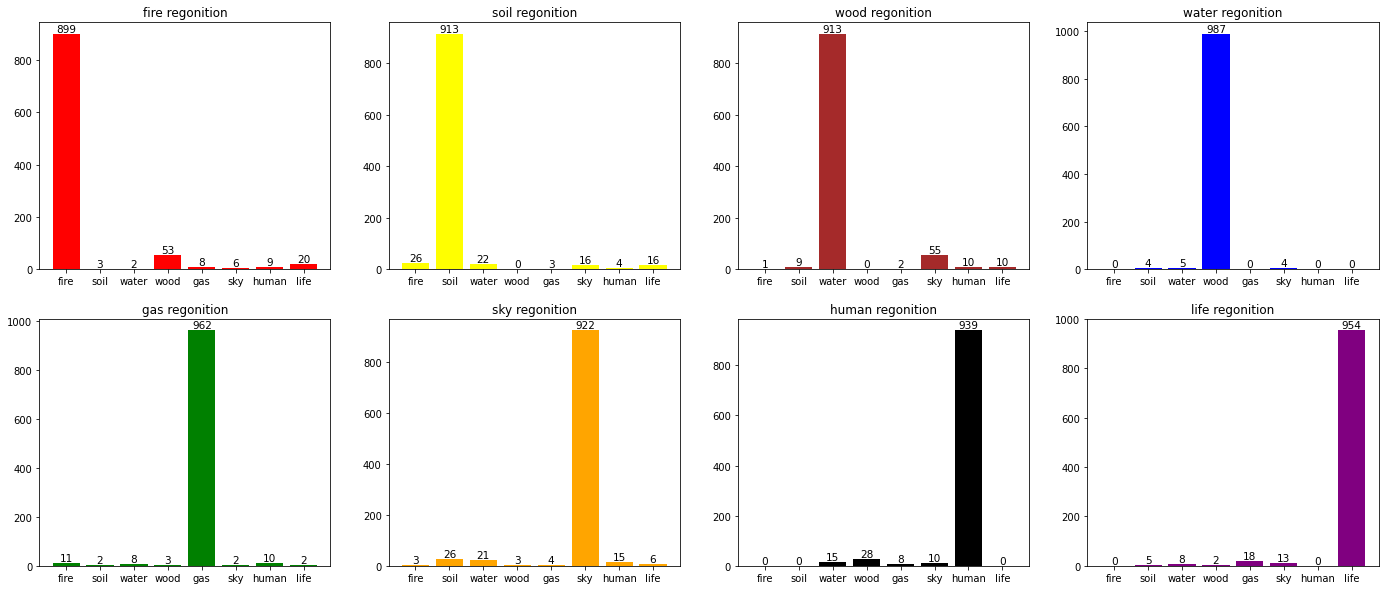

In [47]:
import pandas as pd
#dict1 = pd.DataFrame(pd.Series(f1),columns=["numbers"],index=["fire","soil","water","wood","gas","sky","human","life"])
x=["fire","soil","water","wood","gas","sky","human","life"]
dict1=pd.Series(f1).reindex(["fire","soil","water","wood","gas","sky","human","life"])
dict1=dict1.fillna(0)
#dict1[np.squeeze(np.argwhere(np.isnan(dict1)))]=0
dict2=pd.Series(s1).reindex(["fire","soil","water","wood","gas","sky","human","life"])
dict2=dict2.fillna(0)
#dict2[np.squeeze(np.argwhere(np.isnan(dict2)))]=0
dict3=pd.Series(w1).reindex(["fire","soil","water","wood","gas","sky","human","life"])
dict3=dict3.fillna(0)
#dict3[np.squeeze(np.argwhere(np.isnan(dict3)))]=0
dict4=pd.Series(W1).reindex(["fire","soil","water","wood","gas","sky","human","life"])
dict4=dict4.fillna(0)
#dict4[np.squeeze(np.argwhere(np.isnan(dict4)))]=0
dict5=pd.Series(G1).reindex(["fire","soil","water","wood","gas","sky","human","life"])
dict5=dict5.fillna(0)
#dict5[np.squeeze(np.argwhere(np.isnan(dict5)))]=0
dict6=pd.Series(S1).reindex(["fire","soil","water","wood","gas","sky","human","life"])
dict6=dict6.fillna(0)
#dict6[np.squeeze(np.argwhere(np.isnan(dict6)))]=0
dict7=pd.Series(H1).reindex(["fire","soil","water","wood","gas","sky","human","life"])
dict7=dict7.fillna(0)
#dict7[np.squeeze(np.argwhere(np.isnan(dict7)))]=0
dict8=pd.Series(L1).reindex(["fire","soil","water","wood","gas","sky","human","life"])
dict8=dict8.fillna(0)
#dict8[np.squeeze(np.argwhere(np.isnan(dict8)))]=0
plt.figure(figsize=(24,10))
plt.subplot(241)
plt.bar(x,dict1,color="red")
plt.title("fire regonition")
for i,j in zip(x, dict1):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(242)
plt.bar(x,dict2,color="yellow")
plt.title("soil regonition")
for i,j in zip(x, dict2):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict2)
plt.subplot(243)
plt.bar(x,dict3,color="brown")
plt.title("wood regonition")
for i,j in zip(x, dict3):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(244)
plt.bar(x,dict4,color="blue")
plt.title("water regonition")
for i,j in zip(x, dict4):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(245)
plt.bar(x,dict5,color="green")
plt.title("gas regonition")
for i,j in zip(x, dict5):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(246)
plt.bar(x,dict6,color="orange")
plt.title("sky regonition")
for i,j in zip(x, dict6):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(247)
plt.bar(x,dict7,color="black")
plt.title("human regonition")
for i,j in zip(x, dict7):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
plt.subplot(248)
plt.bar(x,dict8,color="purple")
plt.title("life regonition")
for i,j in zip(x, dict8):
        plt.text(i, j, str(int(j)), ha='center', va='bottom', fontsize=10.5)
#print(dict1)
#list1=dict1.values.tolist()
#plt.savefig("regonition.png")
plt.show()